In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import requests
import bs4


website_url1 = "https://en.wikipedia.org/wiki/List_of_Texas_Rangers_seasons"
website_url2 = "https://en.wikipedia.org/wiki/List_of_Houston_Astros_seasons"
url1 = requests.get(website_url1).text
url2 = requests.get(website_url2).text

In [2]:
from bs4 import BeautifulSoup
soup1 = BeautifulSoup(url1,'html.parser')
soup2 = BeautifulSoup(url2,'html.parser')

In [3]:
print(soup1.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of Texas Rangers seasons - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_Texas_Rangers_seasons","wgTitle":"List of Texas Rangers seasons","wgCurRevisionId":862838137,"wgRevisionId":862838137,"wgArticleId":15686603,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Texas Rangers seasons","Major League Baseball teams seasons","Texas Rangers lists"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFo

In [4]:
# Scraping data for Texas Rangers 
table_class = {"class":"wikitable plainrowheaders"}
rel_table = soup1.find('table',table_class)
rel_table_rows = rel_table.find_all('tr')
rel_table_header = rel_table.find_all('th')
colhead = []
for h in rel_table_header:
    colhead.append(BeautifulSoup(str(h),'html.parser').get_text().split('\n')[0])
l = []
for tr in rel_table_rows:
    td = tr.find_all('td')
    th = tr.find('th')
    row =[tr.text for tr in td]
    row.insert(0,BeautifulSoup(str(th),'html.parser').get_text().split('\n')[0])
    l.append(row)
dftxran = pd.DataFrame(l,columns = colhead[0:11])
df1 = dftxran.dropna().drop(axis=1,labels = ['Playoffs','Awards'])
df1['Season'] = df1['Season'].astype('datetime64')
df1['GB'] = df1['GB'].apply(lambda x: x.split('\n')[0])
df1[['Won','Lost','Win%']] = df1[['Won','Lost','Win%']].astype(float)
df1['Season'] = df1['Season'].apply(lambda x: x.year)
df1.set_index('Season');
df1 = df1[df1['Season']!= 1961].set_index('Season')

In [6]:
df1.head()

,Level,League,Division,Finish,Won,Lost,Win%,GB
Season,,,,,,,,
1962,MLB,AL,,10th,60.0,101.0,0.375,35½
1963,MLB,AL,,10th,56.0,106.0,0.345,48½
1964,MLB,AL,,9th,62.0,100.0,0.382,37
1965,MLB,AL,,8th,70.0,92.0,0.432,32
1966,MLB,AL,,8th,71.0,88.0,0.438,25½


In [5]:
# Scraping data for Houston Astros 
table_class = {"class":"wikitable plainrowheaders"}
rel_table = soup2.find('table',table_class)
rel_table_rows = rel_table.find_all('tr')
rel_table_header = rel_table.find_all('th')
colhead = []
for h in rel_table_header:
    colhead.append(BeautifulSoup(str(h),'html.parser').get_text().split('\n')[0])
l = []
for tr in rel_table_rows:
    td = tr.find_all('td')
    th = tr.find('th')
    row =[tr.text for tr in td]
    row.insert(0,BeautifulSoup(str(th),'html.parser').get_text().split('\n')[0])
    l.append(row)
dfhouast = pd.DataFrame(l,columns = colhead[0:12])
df2 = dfhouast.dropna().drop(axis=1,labels =['Playoffs','Awards'])
for i,x in enumerate(df2.columns.str.split("[")):
    df2.columns.values[i] = x[0]
df2['Season'] = df2['Season'].astype('datetime64')
df2['GB'] = df2['GB'].apply(lambda x: x.split('\n')[0])
df2[['Wins','Losses','Win%']] = df2[['Wins','Losses','Win%']].astype(float)
df2['Season'] = df2['Season'].apply(lambda x: x.year)
df2 = df2.set_index('Season')

In [7]:
df2.head()

,Team,Level,League,Division,Finish,Wins,Losses,Win%,GB
Season,,,,,,,,,
1962,1962,MLB,NL,,8th,64.0,96.0,0.400,36½
1963,1963,MLB,NL,,9th,66.0,96.0,0.407,33
1964,1964,MLB,NL,,9th,66.0,96.0,0.407,27
1965,1965,MLB,NL,,9th,65.0,97.0,0.401,32
1966,1966,MLB,NL,,8th,72.0,90.0,0.444,23


<IPython.core.display.Javascript object>


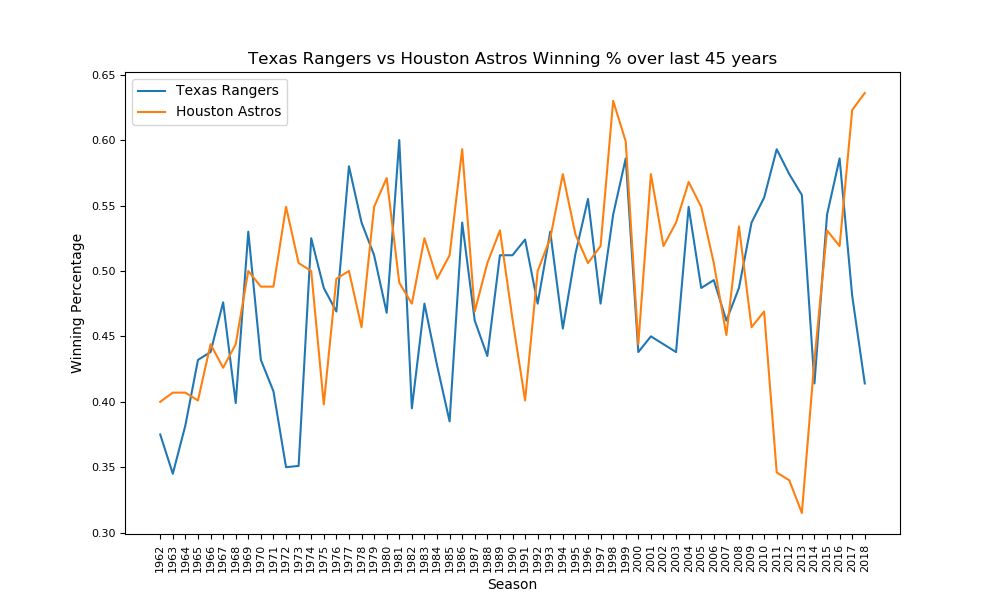

In [8]:
ax = df1.plot.line(y = 'Win%',use_index=True, figsize = (10,6),fontsize = 8, title = 'Texas Rangers vs Houston Astros Winning % over last 45 years')
df2.plot.line(y = 'Win%',use_index=True,ax=ax);
ax.set_xticks(df1.index)
ax.set_xticklabels(labels=df1.index, rotation = 90);
ax.set_ylabel('Winning Percentage')
plt.savefig("C:/Users/suyas/Desktop/MLBtexas.png")
plt.legend(labels = ['Texas Rangers','Houston Astros']);